# Principal component analysis (PCA) / Метод главных компонент (МГК)

---

**Источники:**

[]()

[]()

[]()

[]()

[]()

[]()

[]()

[]()

[]()

[]()

---

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install matplotlib numpy scikit-learn seaborn -y

In [3]:
import numpy as np

np.__version__

'1.20.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.4'

In [5]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [6]:
import seaborn as sns

sns.__version__

'0.11.1'

In [7]:
import sklearn

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import QuantileTransformer

from sklearn.impute import SimpleImputer

sklearn.__version__

'0.24.2'

In [8]:
# ipympl + widget включает интерактивные функции matplotlib

# !conda install ipympl -y
# !conda install -c conda-forge nodejs

## Customer Clustering

### Загрузка данных

[Источник (Customer Clustering)](https://www.kaggle.com/dev0914sharma/customer-clustering)

In [9]:
df = pd.read_csv("./../../data/segmentation data.csv", index_col=0)
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


### Анализ данных

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


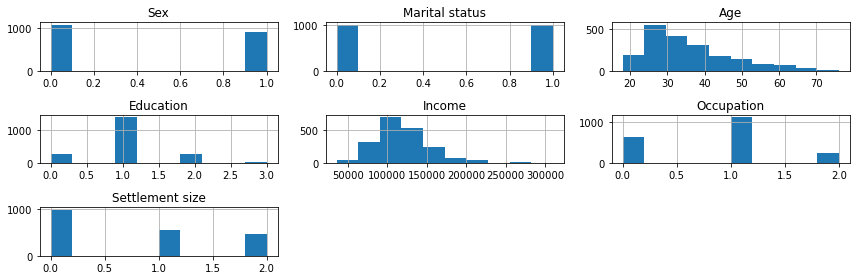

In [11]:
df.hist(figsize=(12, 4))
plt.tight_layout()

### Подготовка

<AxesSubplot:xlabel='ID'>

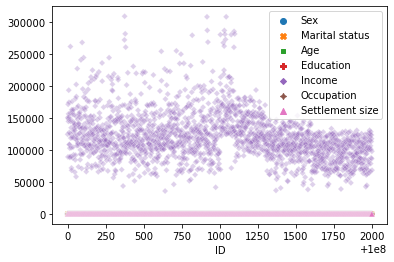

In [12]:
sns.scatterplot(data=df, alpha=0.3)

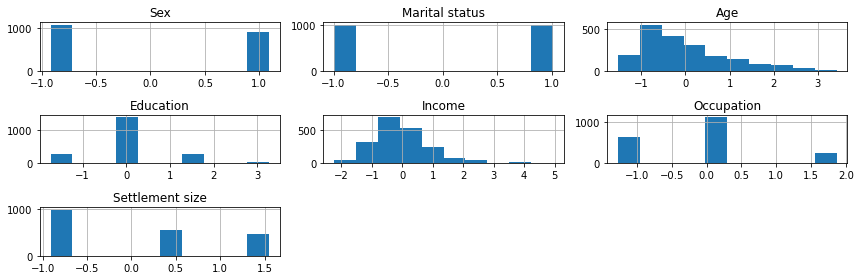

In [13]:
df_norm = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)
df_norm.hist(figsize=(12, 4))
plt.tight_layout()

In [14]:
def explained_variance_plot(pca):
    features = range(pca.n_components_)
    cumulative_sum = np.cumsum(pca.explained_variance_ratio_)

    plt.xlabel('PCA features')
    plt.ylabel('variance %')
    plt.xticks(features)
    
    plt.bar(features, pca.explained_variance_ratio_, align='center', label='Individual explained variance')
    plt.step(range(0,len(cumulative_sum)), cumulative_sum, where='mid',label='Cumulative explained variance')
    
    plt.legend(loc='best')
    plt.tight_layout()

<img src="images/explained_variance_ratio_1.png"/>

<img src="images/explained_variance_ratio_2.png" width=300/>

### N-D PCA

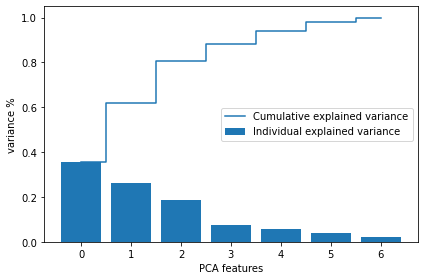

In [15]:
pca = PCA()
pca.fit(df_norm)
explained_variance_plot(pca)

### 2-D PCA

<AxesSubplot:xlabel='0', ylabel='1'>

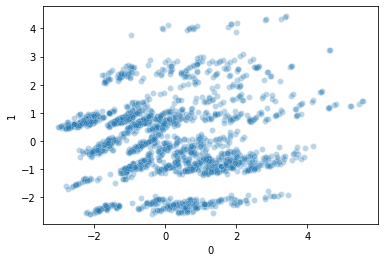

In [16]:
pca_2 = PCA(n_components=2)
df_pca_2 = pd.DataFrame(pca_2.fit_transform(df_norm))
sns.scatterplot(x=df_pca_2[0], y=df_pca_2[1], alpha=0.3)

### 3-D PCA

In [17]:
pca_3 = PCA(n_components=3)
df_pca_3 = pd.DataFrame(pca_3.fit_transform(df_norm))

In [18]:
%matplotlib widget

In [19]:
from mpl_toolkits.mplot3d.axes3d import Axes3D    
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)

ax.scatter(df_pca_3[0], df_pca_3[1], df_pca_3[2], alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [20]:
%matplotlib inline

---

## Credit Card Dataset for Clustering

### Загрузка данных

[Источник (Credit Card Dataset for Clustering)](https://www.kaggle.com/arjunbhasin2013/ccdata)

In [21]:
df = pd.read_csv("./../../data/CC GENERAL.csv", index_col=0)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6


### Анализ данных

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

In [23]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [24]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


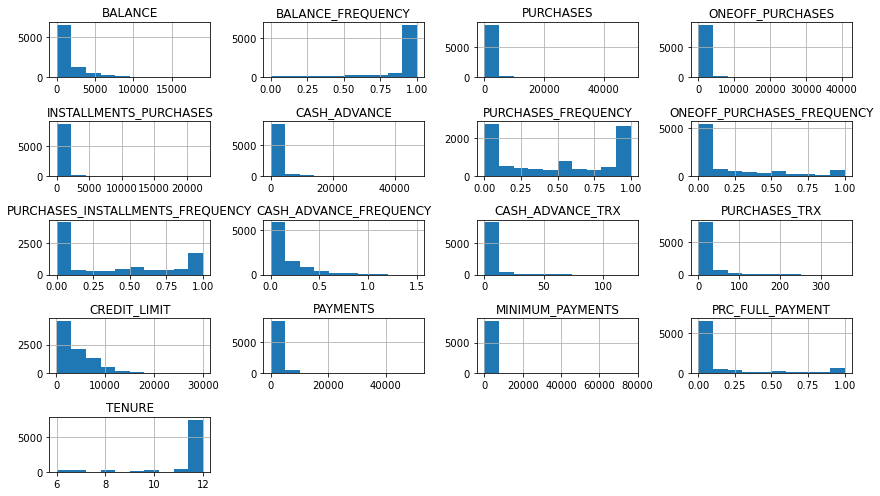

In [25]:
df.hist(figsize=(12, 7))
plt.tight_layout()

### Подготовка

In [26]:
df_without_nan = pd.DataFrame(SimpleImputer(strategy='median').fit_transform(df), columns=df.columns)
df_without_nan.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

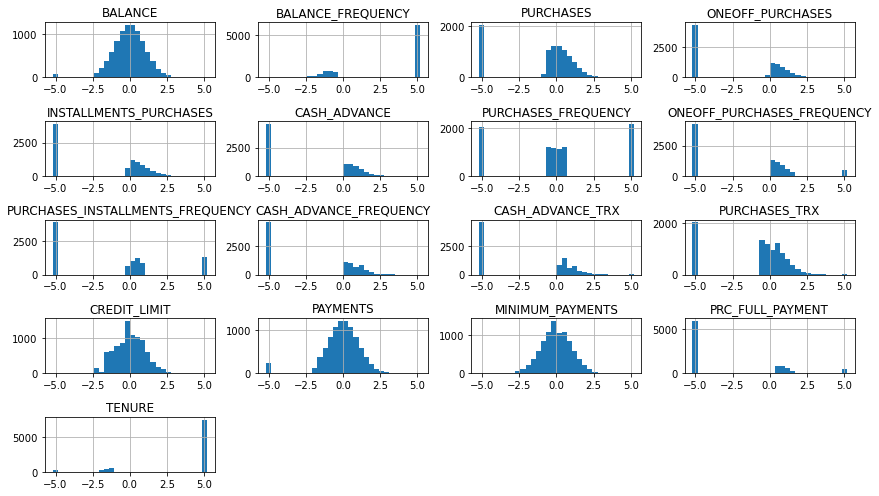

In [27]:
quant_trans = QuantileTransformer(output_distribution='normal')
df_norm = pd.DataFrame(quant_trans.fit_transform(df_without_nan), columns=df.columns)
df_norm.hist(bins=30, figsize=(12, 7))
plt.tight_layout()

### N-D PCA

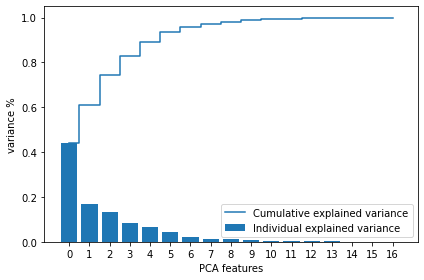

In [28]:
pca = PCA()
pca.fit(df_norm)
explained_variance_plot(pca)

### 2-D PCA

In [29]:
pca_2 = PCA(n_components=2)
df_pca_2 = pd.DataFrame(pca_2.fit_transform(df_norm))
df_pca_2

,0,1
0,2.163699,-6.912246
1,-11.234460,-3.138915
2,4.975619,5.658303
3,-3.872844,4.528866
4,0.612076,1.129461
...,...,...
8945,5.714757,-6.516668
8946,4.694801,-4.960993
8947,3.275390,-8.942454
8948,-10.979687,-5.694503


<AxesSubplot:xlabel='0', ylabel='1'>

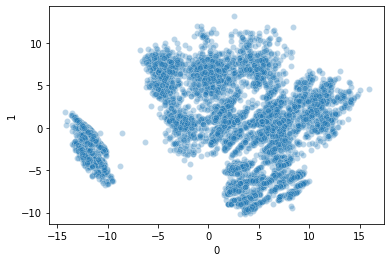

In [30]:
sns.scatterplot(x=df_pca_2[0], y=df_pca_2[1], alpha=0.3)

### 3-D PCA

In [31]:
pca_3 = PCA(n_components=3)
df_pca_3 = pd.DataFrame(pca_3.fit_transform(df_norm))
df_pca_3

,0,1,2
0,2.163699,-6.912246,-0.353669
1,-11.234460,-3.138915,-0.281445
2,4.975619,5.658303,-7.210849
3,-3.872844,4.528866,-4.249755
4,0.612076,1.129461,-6.505020
...,...,...,...
8945,5.714757,-6.516668,1.963035
8946,4.694801,-4.960993,2.387508
8947,3.275390,-8.942454,-0.812840
8948,-10.979687,-5.694503,-2.295634


In [32]:
%matplotlib widget

In [33]:
from mpl_toolkits.mplot3d.axes3d import Axes3D    
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)

ax.scatter(df_pca_3[0], df_pca_3[1], df_pca_3[2], alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [34]:
%matplotlib inline